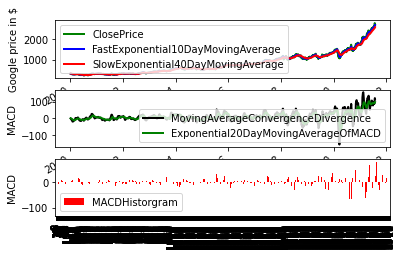

In [1]:
# Implementation of the moving average convergence divergence

import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

start_data = '2010-01-01'
end_data = '2021-08-01'
FILENAME = 'goog_data_2010_2021.pkl'

try:
    goog_data = pd.read_pickle(FILENAME)
except FileNotFoundError:
    goog_data = data.DataReader('GOOG', 'yahoo', start_data, end_data)
    goog_data.to_pickle(FILENAME)

close = goog_data['Close']

num_periods_fast = 10
K_fast = 2 / (num_periods_fast + 1)
ema_fast = 0

num_periods_slow = 40
K_slow = 2 / (num_periods_slow + 1)
ema_slow = 0

num_periods_macd = 20
K_macd = 2 / (num_periods_macd + 1)
ema_macd = 0

ema_fast_values = []
ema_slow_values = []
macd_values = []
macd_signal_values = []
macd_histogram_values = []

for close_price in close:
    if (ema_fast == 0):
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
    
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    macd = ema_fast - ema_slow

    if ema_macd == 0:
        ema_macd = macd
    else:
        ema_macd = (macd - ema_macd) * K_slow + ema_macd
    
    macd_values.append(macd)
    macd_signal_values.append(ema_macd)
    macd_histogram_values.append(macd - ema_macd)

goog_data = goog_data.assign(
    ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(
    ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(
    ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(MovingAverageConvergenceDivergence=pd.Series(
    macd_values, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverageOfMACD=pd.Series(
    macd_signal_values, index=goog_data.index))
goog_data = goog_data.assign(MACDHistorgram=pd.Series(
    macd_histogram_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
macd = goog_data['MovingAverageConvergenceDivergence']
ema_macd = goog_data['Exponential20DayMovingAverageOfMACD']
macd_histogram = goog_data['MACDHistorgram']

fig = plt.figure()

ax1 = fig.add_subplot(311, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)

ax2 = fig.add_subplot(312, ylabel='MACD')
macd.plot(ax=ax2, color='black', lw=2., legend=True)
ema_macd.plot(ax=ax2, color='g', lw=2., legend=True)

ax3 = fig.add_subplot(313, ylabel='MACD')
macd_histogram.plot(ax=ax3, color='r', kind='bar', legend=True, use_index=False)

plt.show()